In [1]:
import Scripts.CustomScripts as CS
import Scripts.generate_weight_from_logic as GWL
import numpy as np

In [2]:
# Weight matrix
J_bipolar = np.array([
   #  A0  B0  A1  B1  H0  H1  H2  H3  C1  C2  S0  S1  S2  S3 
    [ 0, -1,  0, -1,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0],
    [-1,  0, -1,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,  0],
    [ 0, -1,  0, -1,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0],
    [-1,  0, -1,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0],
    [ 2,  0,  0,  2,  0, -1,  0,  2, -1,  0,  0,  1,  0,  0],
    [ 0,  2,  2,  0, -1,  0,  0,  2, -1,  0,  0,  1,  0,  0],
    [ 0,  0,  2,  2,  0,  0,  0, -1,  0, -1,  0,  0,  1,  2],
    [ 0,  0,  0,  0,  2,  2, -1,  0,  2, -1,  0, -2,  1,  2],
    [ 0,  0,  0,  0, -1, -1,  0,  2,  0,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  1,  2],
    [ 2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  1,  1,  0, -2,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0, -2],
    [ 0,  0,  0,  0,  0,  0,  2,  2,  0,  2,  0,  0, -2,  0]
])

# Bias 
h_bipolar_floating = np.array([ 2, 2, 2, 2, -2, -2, -2, 0, -20, -20, -2, 0, 0, 0]) 

J_params, J_init, h_params, h_array_init = CS.generate_verilog_params(J_bipolar, h_bipolar_floating)

# Generate seeds
seeds_formatted = CS.generate_seed_array(len(h_bipolar_floating))

# Print results
print("Generated Verilog Parameters:\n")
print(J_params)
print(J_init)
print()
print(h_params)
print(h_array_init)
print()
print("Generated Seeds:")
print(seeds_formatted)

Converted to binary:
[[ 0. -2.  0. -2.  4.  0.  0.  0.  0.  0.  4.  0.  0.  0.]
 [-2.  0. -2.  0.  0.  4.  0.  0.  0.  0.  4.  0.  0.  0.]
 [ 0. -2.  0. -2.  0.  4.  4.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  0. -2.  0.  4.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  4.  0. -2.  0.  4. -2.  0.  0.  2.  0.  0.]
 [ 0.  4.  4.  0. -2.  0.  0.  4. -2.  0.  0.  2.  0.  0.]
 [ 0.  0.  4.  4.  0.  0.  0. -2.  0. -2.  0.  0.  2.  4.]
 [ 0.  0.  0.  0.  4.  4. -2.  0.  4. -2.  0. -4.  2.  4.]
 [ 0.  0.  0.  0. -2. -2.  0.  4.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2. -2.  0.  0.  0.  0.  2.  4.]
 [ 4.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  2.  0. -4.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  2.  0.  2.  0.  0.  0. -4.]
 [ 0.  0.  0.  0.  0.  0.  4.  4.  0.  4.  0.  0. -4.  0.]]
[  0.   0.   0.   0.  -7.  -7.  -7.  -5. -21. -21.  -6.  -1.  -1.  -4.]
Generated Verilog Parameters:

parameter J_0000 = 8'sb00000000;
parameter J_0001

In [3]:
label_mapping = {
    ( 0, 0, 0, 0, -7, -7, -7, -5, -16, -16, -6, -1, -1, -4) : "Floating State",
    ( 0, 0, 0, 0, -7, -7, -7, -5, -16, -16, -16, 15.876, 15.875, -16) : "Output = 6, factors (3x2,2x3)",
    ( 0, 0, 0, 0, -7, -7, -7, -5, -16, -16, 15.875, -16, -16, 15.875) : "Output = 9, factors (3x3)",
}

CS.generate_verilog_biases(label_mapping_binary=label_mapping)

#1000000;
// h_bipolar(Floating State)
0
h[0] = 8'sb00000000;
0
h[1] = 8'sb00000000;
0
h[2] = 8'sb00000000;
0
h[3] = 8'sb00000000;
-7
h[4] = 8'sb11001000;
-7
h[5] = 8'sb11001000;
-7
h[6] = 8'sb11001000;
-5
h[7] = 8'sb11011000;
-16
h[8] = 8'sb10000000;
-16
h[9] = 8'sb10000000;
-6
h[10] = 8'sb11010000;
-1
h[11] = 8'sb11111000;
-1
h[12] = 8'sb11111000;
-4
h[13] = 8'sb11100000;
bias[0] = s4_3_to_real(h[0]);
bias[1] = s4_3_to_real(h[1]);
bias[2] = s4_3_to_real(h[2]);
bias[3] = s4_3_to_real(h[3]);
bias[4] = s4_3_to_real(h[4]);
bias[5] = s4_3_to_real(h[5]);
bias[6] = s4_3_to_real(h[6]);
bias[7] = s4_3_to_real(h[7]);
bias[8] = s4_3_to_real(h[8]);
bias[9] = s4_3_to_real(h[9]);
bias[10] = s4_3_to_real(h[10]);
bias[11] = s4_3_to_real(h[11]);
bias[12] = s4_3_to_real(h[12]);
bias[13] = s4_3_to_real(h[13]);

#1000000;
// h_bipolar(Output = 6, factors (3x2,2x3))
0
h[0] = 8'sb00000000;
0
h[1] = 8'sb00000000;
0
h[2] = 8'sb00000000;
0
h[3] = 8'sb00000000;
-7
h[4] = 8'sb11001000;
-7
h[5] = 8'sb11001000;


['A0', 'B0', 'A1', 'B1', 'H0', 'H1', 'H2', 'H3', 'C1', 'C2', 'S0', 'S1', 'S2', 'S3']
Update order groups (variables that can be updated simultaneously):
Step 1: ['A0', 'A1', 'H3']
Step 2: ['B0', 'H0', 'H2']
Step 3: ['B1', 'H1', 'C2', 'S0']
Step 4: ['C1', 'S2']
Step 5: ['S1', 'S3']

Clock cycles needed for full update (sequential) = 42
Clock cycles needed for full update (parallelized) = 15
Speed increase percentage = 35.71

SystemVerilog lookup table:
3'b000 : Pbit_EN = 14'b10100001000000;
3'b001 : Pbit_EN = 14'b01001010000000;
3'b010 : Pbit_EN = 14'b00010100011000;
3'b011 : Pbit_EN = 14'b00000000100010;
3'b100 : Pbit_EN = 14'b00000000000101;


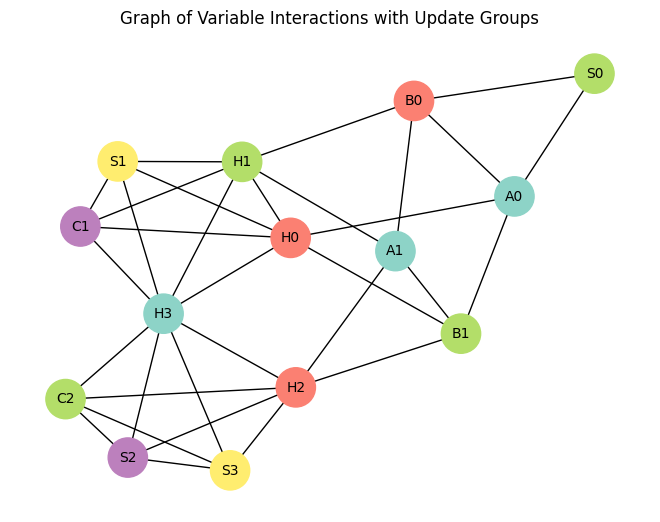

In [4]:
import numpy as np

# Define the interaction matrix.
J_bipolar = np.array([
   #  A0  B0  A1  B1  H0  H1  H2  H3  C1  C2  S0  S1  S2  S3 
    [ 0, -1,  0, -1,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0],
    [-1,  0, -1,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,  0],
    [ 0, -1,  0, -1,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0],
    [-1,  0, -1,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0],
    [ 2,  0,  0,  2,  0, -1,  0,  2, -1,  0,  0,  1,  0,  0],
    [ 0,  2,  2,  0, -1,  0,  0,  2, -1,  0,  0,  1,  0,  0],
    [ 0,  0,  2,  2,  0,  0,  0, -1,  0, -1,  0,  0,  1,  2],
    [ 0,  0,  0,  0,  2,  2, -1,  0,  2, -1,  0, -2,  1,  2],
    [ 0,  0,  0,  0, -1, -1,  0,  2,  0,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  1,  2],
    [ 2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  1,  1,  0, -2,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0, -2],
    [ 0,  0,  0,  0,  0,  0,  2,  2,  0,  2,  0,  0, -2,  0]
])

# Optional: give the indices human-readable names.
var_names = ["A0", "B0", "A1", "B1", "H0", "H1", "H2", "H3", "C1", "C2", "S0", "S1", "S2", "S3"]
print(var_names)

CS.generate_group_update_order(J_bipolar, var_names, group_bit_width=3)

In [5]:
circuit = {
    "nodes": ["A0","B0","A1","B1","H0","H1","H2","H3","Cin1","Cin2","S0","S1","S2","S3"],
    "gates": [
        {"type": "AND", "nodes": ["A0", "B0", "S0"]},
        {"type": "AND", "nodes": ["A0", "B1", "H0"]},
        {"type": "AND", "nodes": ["A1", "B0", "H1"]},
        {"type": "AND", "nodes": ["A1", "B1", "H2"]},

        {"type": "FA", "nodes": ["Cin1", "H1", "H0", "S1", "H3"]},
        {"type": "FA", "nodes": ["Cin2", "H2", "H3", "S2", "S3"]},
    ]
}
GWL.generate_circuit_weights(circuit)

Overall bias vector (h_total) in np.array format:
np.array([ 2.,  2.,  2.,  2., -2., -2., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.])

Overall weight matrix (J_total) in np.array format:
np.array([[ 0., -1.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
 [-1.,  0., -1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
 [ 0., -1.,  0., -1.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
 [-1.,  0., -1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
 [ 2.,  0.,  0.,  2.,  0., -1.,  0.,  2., -1.,  0.,  0.,  1.,  0.,  0.],
 [ 0.,  2.,  2.,  0., -1.,  0.,  0.,  2., -1.,  0.,  0.,  1.,  0.,  0.],
 [ 0.,  0.,  2.,  2.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  1.,  2.],
 [ 0.,  0.,  0.,  0.,  2.,  2., -1.,  0.,  2., -1.,  0., -2.,  1.,  2.],
 [ 0.,  0.,  0.,  0., -1., -1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.],
 [ 0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  1.,  2.],
 [ 2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
 [ 0

(array([ 2.,  2.,  2.,  2., -2., -2., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.]),
 array([[ 0., -1.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
        [-1.,  0., -1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  0.,  0.,  2.,  0., -1.,  0.,  2., -1.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  2.,  2.,  0., -1.,  0.,  0.,  2., -1.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  1.,  2.],
        [ 0.,  0.,  0.,  0.,  2.,  2., -1.,  0.,  2., -1.,  0., -2.,  1.,  2.],
        [ 0.,  0.,  0.,  0., -1., -1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  1.,  2.],
        [ 2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  